<a href="https://colab.research.google.com/github/Vivek-84/A-3/blob/main/Implementation_of_ANN_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
# pip install tensorflow
import tensorflow as tf
import keras
print(tf.__version__) # Tensorflow version
print(keras.__version__) # Keras Version

2.14.0
2.14.0


Q2. Load the Wine Quality dataset and explore its dimensions.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
df = pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Q3. Check for null values, identify categorical variables, and encode them.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [6]:
# Encoding of the category in classes
df['quality'] = np.where(df['quality'].str.contains('bad'),0,1)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [8]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Q4. Separate the features and target variables from the dataset.

In [10]:
## Independent and Dependent features
X = df.iloc[: , : -1 ] ## Independent features
y = df.iloc[: ,-1]  ## Dependent feature

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [11]:
## Spliting the dataset into Training and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8


Q6. Scale the dataset using an appropriate scaling technique.

In [13]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
8. Create a Sequential model in Keras and add the previously designed layers to it

In [15]:
## Now create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [16]:
### Lets initialize the ANN
classifier = Sequential()

In [17]:
## Adding the input Layer
classifier.add(Dense(units = 11,activation = 'relu'))
## Adding first hidden layer
classifier.add(Dense(units = 7, activation= 'relu'))
classifier.add(Dropout(0.2))
## Adding Second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))
classifier.add(Dropout(0.2))
## Adding the Output layer
classifier.add(Dense(1,activation = 'sigmoid'))

# Build the model
classifier.build(input_shape=(None, 11))

Q9. Print the summary of the model architecture.

In [18]:
model_summary = classifier.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 

10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
11. Compile the model with the specified loss function, optimizer, and metrics.

In [19]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

12.Fit the model to the training data using appropriate batch size and number of epochs.

In [21]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
86/86 [==============================] - 1s 10ms/step - loss: 0.4352 - accuracy: 0.8002 - val_loss: 0.7481 - val_accuracy: 0.7234
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 0.3992 - accuracy: 0.7991 - val_loss: 0.8502 - val_accuracy: 0.7234
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 0.4240 - accuracy: 0.8014 - val_loss: 0.7814 - val_accuracy: 0.7352
Epoch 4/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4245 - accuracy: 0.7967 - val_loss: 0.7835 - val_accuracy: 0.7305
Epoch 5/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4126 - accuracy: 0.8072 - val_loss: 0.8276 - val_accuracy: 0.7234
Epoch 6/100
86/86 [==============================] - 1s 11ms/step - loss: 0.4100 - accuracy: 0.7979 - val_loss: 0.7461 - val_accuracy: 0.7281
Epoch 7/100
86/86 [==============================] - 1s 11ms/step - loss: 0.4245 - accuracy: 0.8189 - val_loss: 0.9140 - val_accuracy: 0.7376
Epoch 8/1

13. Obtain the model's parameters (weights and biases).

In [23]:
hidden1 =classifier.layers[0]
hidden1.get_weights() # The weights of first hidden layer

[array([[-1.5828793 ,  0.27460575, -0.03978751, -0.83277386, -1.4940897 ,
          0.02043202, -1.1381794 ,  2.352092  ,  1.2102556 , -2.2873726 ,
         -1.8597064 ],
        [-0.345731  ,  0.01988343,  0.15949368,  1.6058469 ,  0.05780864,
         -2.645308  ,  1.0437587 ,  0.62388605,  0.38757387,  0.17307594,
          1.8983155 ],
        [ 0.11205342, -2.4368093 ,  2.5984483 , -0.30246785,  0.31160402,
         -0.79310983,  0.5089072 , -1.3098199 ,  1.8698452 ,  0.48184192,
          0.51700133],
        [ 1.3712821 ,  1.0507274 , -2.8526132 ,  1.1648707 , -0.11702064,
         -1.6910431 , -0.56504697,  1.788775  , -0.016682  , -0.80170375,
         -0.80494124],
        [ 2.4018853 ,  0.35780326,  1.2685711 ,  0.515018  ,  1.8870925 ,
         -0.26515988, -0.34043348,  0.6389726 ,  0.71531373,  2.5337384 ,
          2.1624339 ],
        [-0.5566535 , -2.1873257 ,  1.1378057 ,  0.7548479 ,  0.8966507 ,
          0.666582  , -1.071523  ,  0.65683883,  1.1712223 , -0.3323671

In [34]:
hidden1 =classifier.layers[0]
hidden1.get_weights()[0] # The weight of first hidden layer

array([[-1.5828793 ,  0.27460575, -0.03978751, -0.83277386, -1.4940897 ,
         0.02043202, -1.1381794 ,  2.352092  ,  1.2102556 , -2.2873726 ,
        -1.8597064 ],
       [-0.345731  ,  0.01988343,  0.15949368,  1.6058469 ,  0.05780864,
        -2.645308  ,  1.0437587 ,  0.62388605,  0.38757387,  0.17307594,
         1.8983155 ],
       [ 0.11205342, -2.4368093 ,  2.5984483 , -0.30246785,  0.31160402,
        -0.79310983,  0.5089072 , -1.3098199 ,  1.8698452 ,  0.48184192,
         0.51700133],
       [ 1.3712821 ,  1.0507274 , -2.8526132 ,  1.1648707 , -0.11702064,
        -1.6910431 , -0.56504697,  1.788775  , -0.016682  , -0.80170375,
        -0.80494124],
       [ 2.4018853 ,  0.35780326,  1.2685711 ,  0.515018  ,  1.8870925 ,
        -0.26515988, -0.34043348,  0.6389726 ,  0.71531373,  2.5337384 ,
         2.1624339 ],
       [-0.5566535 , -2.1873257 ,  1.1378057 ,  0.7548479 ,  0.8966507 ,
         0.666582  , -1.071523  ,  0.65683883,  1.1712223 , -0.3323671 ,
         1.571

In [35]:
hidden1 =classifier.layers[0]
hidden1.get_weights()[1] # The Biase of first hidden layer

array([-3.8669949 , -2.1516788 , -1.4799191 , -0.21564429, -2.3929396 ,
        0.31945038, -1.9104354 ,  0.16722016, -0.78892434, -0.17998941,
       -0.5260889 ], dtype=float32)

Q14. Store the model's training history as a Pandas DataFrame.

In [37]:
pd.DataFrame(model_history.history) # All the losses and accuracy in each epoch


,loss,accuracy,val_loss,val_accuracy
0,0.435203,0.800234,0.748138,0.723404
1,0.399180,0.799065,0.850178,0.723404
2,0.423996,0.801402,0.781365,0.735225
3,0.424508,0.796729,0.783541,0.730496
4,0.412584,0.807243,0.827586,0.723404
...,...,...,...,...
95,0.399148,0.818925,0.777029,0.730496
96,0.385617,0.788551,0.811635,0.713948
97,0.407078,0.799065,0.658906,0.732861
98,0.396555,0.803738,0.737128,0.728132


15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

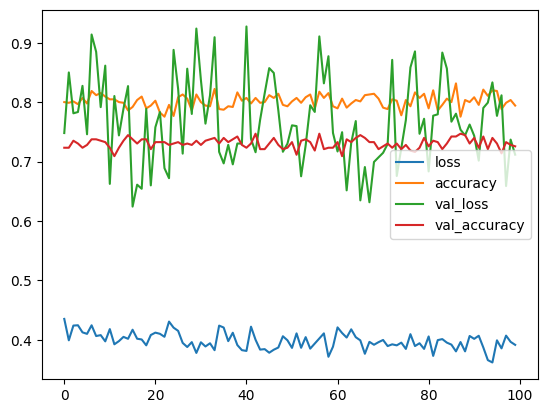

In [38]:
pd.DataFrame(model_history.history).plot() # Plotting all of the accuracy and losses


16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [44]:
## Part 3, Making Pridictions and evaluting the model
# Pridicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

10/10 [==============================] - 0s 2ms/step


In [45]:
## Make the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 93,  55],
       [ 30, 142]])